In [ ]:
# Importing required packages
import pandas as pd
import opendatasets as od
import string
import nltk
nltk.download('punkt')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import ngrams
from nltk import trigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import reuters
from collections import Counter, defaultdict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#import the dataset from Kaggle
od.download("https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maneshkumar
Your Kaggle Key: ··········


100%|██████████| 1.30M/1.30M [00:00<00:00, 103MB/s]

In [ ]:
# Load the CSV file into a pandas
# csv_path = r"C:\Users\456871\OneDrive - Alstom\Manesh Files\Manesh\Learnings\BITS_PILANI\Data_Science\Semester3\Natural Language Processing\Assignment-1\BA_AirlineReviews.csv"
csv_path = "airline-reviews/BA_AirlineReviews.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [ ]:
df.shape

(3701, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

Obeservations :- Here we can see that we have many columns in dataset but we are going to take only "ReviewHeader" and "ReviewBody" for further processing as per required questions to solve in assginemt's problem statment.

In [ ]:
# Saving copy of orignal databse
df_copy_part2=df.copy()
df_copy_part2.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


## Collecting Corpus & Lowercasing

In [ ]:
# Define the columns(review feedbacks) that we want to read from Dataset
#feedback_column = 'ReviewHeader' & 'ReviewBody'
# List of columns to convert to lowercase
selected_columns = ['ReviewHeader','ReviewBody']
df[selected_columns] = df[selected_columns].apply(lambda x: x.str.lower())

# Only taking two columns 'ReviewHeader' & 'ReviewBody' for our processing. hence droping other columns
df=df[selected_columns]
df.head(5)

,ReviewHeader,ReviewBody
0,"""service level far worse then ryanair""",4 hours before takeoff we received a mail stat...
1,"""do not upgrade members based on status""",i recently had a delay on british airways from...
2,"""flight was smooth and quick""","boarded on time, but it took ages to get to th..."
3,"""absolutely hopeless airline""","5 days before the flight, we were advised by b..."
4,"""customer service is non existent""","we traveled to lisbon for our dream vacation, ..."


Observations :- Here we have taken only "ReviewHeader" and "ReviewBody" columns and performed lowercasing for both selected columns. We will perform required preprocessing for NLP on these two selcted columns.

## Remove Panctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
string.punctuation = string.punctuation +'"'+'"'+'-'+'''+'''+'—'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~""-+—'

In [ ]:
# Define a function to remove punctuation using lambda approach
def remove_punctuation(text):
    return text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
# Remove punctuations
selected_columns = ['ReviewHeader','ReviewBody']
df[selected_columns] = df[selected_columns].apply(remove_punctuation)
df.head(5)

,ReviewHeader,ReviewBody
0,service level far worse then ryanair,4 hours before takeoff we received a mail stat...
1,do not upgrade members based on status,i recently had a delay on british airways from...
2,flight was smooth and quick,boarded on time but it took ages to get to the...
3,absolutely hopeless airline,5 days before the flight we were advised by ba...
4,customer service is non existent,we traveled to lisbon for our dream vacation a...


Obervations :- Here we have used "apply" method and transformed each element in the specified columns using the remove_punctuation function.
The lambda function inside remove_punctuation utilizes the translate method with str.maketrans('', '', string.punctuation) to remove punctuation. As a result cleaned DataFrame is generated

## Joining selected columns into single Corpus

In [ ]:
# Merge the two columns 'ReviewHeader' & 'ReviewBody' into a single corpus
corpus_review_header = ' '.join(df['ReviewHeader'].astype(str))
corpus_review_body = ' '.join(df['ReviewBody'].astype(str))

In [ ]:
# Check length of review header corpus
print(len(corpus_review_header))
# Display the first 1000 characters to shorten the long output window
corpus_review_header[:1000]

110531


'service level far worse then ryanair do not upgrade members based on status flight was smooth and quick absolutely hopeless airline customer service is non existent i can’t imagine a worst airline sufficient leg and arm room “crew were polite” angry disappointed and unsatisfied ba now stands for basic airways a totally unremarkable flight “ba clearly does not care” reflect a downward trend of the airline one of my better flights i would still recommend ba  the worst experience ever an exceptional crew member  even ryanair have more space inflight service is usually weak ba customer service is a disgrace little concern for customer service gave up being a fullservice airline “i hate british airways” 2½ hours before the bags finally arrived  left on your own and nobody cares club europe is simply a joke very second rate shoddy airline some sort of medieval torture never again ba  ba gatwick are not ba  boarding flight took an hour  our luggage was soaking wet the worst airline i have ev

In [ ]:
# Check length of review body corpus
print(len(corpus_review_body))
# Display the first 1000 characters to shorten the long output window
corpus_review_body[:1000]

3196194


'4 hours before takeoff we received a mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time so did the capacity of the heathrow airport really hit british airways by surprise 4h before departure anyhow  we took the one hour delay so what  but then we have been forced to check in our hand luggage i travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage overall 2h later at home than planed with really no reason just due to incompetent people service level far worse then ryanair and triple the price really never again thanks for nothing i recently had a delay on british airways from bru to lhr that was due to staff shortages they announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early we had to wait the full 2 hours inside the airplane the plane was old dirty had no power at the seat

In [ ]:
# Combined both columns in one complete corpus
combined_corpus = corpus_review_header + corpus_review_body
# Check length of complete corpus
print(len(combined_corpus))
# Display the first 1000 characters to shorten the long output window
combined_corpus[:1000]

3306725


'service level far worse then ryanair do not upgrade members based on status flight was smooth and quick absolutely hopeless airline customer service is non existent i can’t imagine a worst airline sufficient leg and arm room “crew were polite” angry disappointed and unsatisfied ba now stands for basic airways a totally unremarkable flight “ba clearly does not care” reflect a downward trend of the airline one of my better flights i would still recommend ba  the worst experience ever an exceptional crew member  even ryanair have more space inflight service is usually weak ba customer service is a disgrace little concern for customer service gave up being a fullservice airline “i hate british airways” 2½ hours before the bags finally arrived  left on your own and nobody cares club europe is simply a joke very second rate shoddy airline some sort of medieval torture never again ba  ba gatwick are not ba  boarding flight took an hour  our luggage was soaking wet the worst airline i have ev

Obervations :- Here we have combined both columns into one single corpus. Due to long length of coprus , we have shown only intial parts of it using slicing approach.

In [ ]:
# Tokenize the corpus into sentences
sentences = nltk.sent_tokenize(combined_corpus)

Obervations :- Using the Natural Language Toolkit (nltk) to tokenize a combined corpus into sentences.

In [ ]:
# Tokenize the corpus into words
words = nltk.word_tokenize(combined_corpus)

Obervations :- Using the Natural Language Toolkit (nltk) to tokenize a combined corpus into individual words.

In [ ]:
# Check length of words
print(len(words))
# Display the first 20 words to shorten the long output window
words[:20]

609614


['service',
 'level',
 'far',
 'worse',
 'then',
 'ryanair',
 'do',
 'not',
 'upgrade',
 'members',
 'based',
 'on',
 'status',
 'flight',
 'was',
 'smooth',
 'and',
 'quick',
 'absolutely',
 'hopeless']

## Stop Words Removal

In [ ]:
# List of English stop words
english_stop_words=set(stopwords.words("english"))
# Here we are going to remove all english stop words except 'no' and 'not' from corpus data.
english_stop_words=[item for item in english_stop_words if item not in ['no','not'] ]
print(len(english_stop_words))
print(english_stop_words)

177
['himself', 'under', "couldn't", 'doing', 'me', 'have', "that'll", 'whom', "wasn't", "mightn't", 'ourselves', 'with', 'him', 'that', 'i', 'themselves', 'and', 'weren', 'about', 'out', 'wouldn', 'an', 'more', 'd', "you'll", 'o', "hasn't", "aren't", 'am', 'above', 'so', 'after', 'did', 'who', 'you', 'won', 'aren', 'should', "you've", 'up', 'down', 'than', "you're", 'these', 'on', 'them', 'yourself', 'because', 'own', 'mustn', 'being', 'below', "won't", 'or', 'before', 'a', 'each', 'some', 'are', 're', 'were', "mustn't", 'itself', "didn't", 'all', 'then', 'their', 'shan', 'what', 'its', "shouldn't", 'doesn', 'mightn', 'been', 'why', 'between', 'we', 'just', 'at', 'll', "you'd", "she's", 'which', 'does', 'during', 'through', 'same', 'having', 'hadn', 'ma', 'herself', "weren't", 'there', 'both', 'now', 'will', 'theirs', 'hers', 'm', 'she', 's', "shan't", 'myself', 'ain', 'how', 'but', "needn't", 'when', 'to', 'further', 'into', 'very', "hadn't", 'yourselves', 'his', 'had', 'off', 'wasn'

Observations :- Here we are going to remove all english stop words excluding 'no' and 'not' from corpus data.

In [ ]:
# Removal of stop words from the words corpus
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in english_stop_words]

Obervations :- filtered_words contains a list of words from the original list (words), excluding stop words and non-alphabetic characters.

In [ ]:
# Check length of filtered_words
print(len(filtered_words))
print("\n")
# Display the first 20 words to shorten the long output window
filtered_words[:20]

324138




['service',
 'level',
 'far',
 'worse',
 'ryanair',
 'not',
 'upgrade',
 'members',
 'based',
 'status',
 'flight',
 'smooth',
 'quick',
 'absolutely',
 'hopeless',
 'airline',
 'customer',
 'service',
 'non',
 'existent']

## Create Trigrams

In [ ]:
# Create trigrams
trigrams = list(ngrams(filtered_words, 3))
# Display the first 20 trigrams to shorten the lonng output window
trigrams[:20]

[('service', 'level', 'far'),
 ('level', 'far', 'worse'),
 ('far', 'worse', 'ryanair'),
 ('worse', 'ryanair', 'not'),
 ('ryanair', 'not', 'upgrade'),
 ('not', 'upgrade', 'members'),
 ('upgrade', 'members', 'based'),
 ('members', 'based', 'status'),
 ('based', 'status', 'flight'),
 ('status', 'flight', 'smooth'),
 ('flight', 'smooth', 'quick'),
 ('smooth', 'quick', 'absolutely'),
 ('quick', 'absolutely', 'hopeless'),
 ('absolutely', 'hopeless', 'airline'),
 ('hopeless', 'airline', 'customer'),
 ('airline', 'customer', 'service'),
 ('customer', 'service', 'non'),
 ('service', 'non', 'existent'),
 ('non', 'existent', 'imagine'),
 ('existent', 'imagine', 'worst')]

Obervations :- The ngrams function is applied to filtered_words with a window size of 3, creating trigrams.

## Function to recommend the top 3 words based on trigrams

In [ ]:
def recommend_words(sentence):

    print("Input Test Corpus for which need to suggest 3 recommended words :\n", sentence)

    # Lowercasing & Tokenize the given sentence corpus
    input_tokens = nltk.word_tokenize(sentence.lower())

    # Removal of panctuation
    input_tokens = [input_token for input_token in input_tokens if input_token not in string.punctuation]

    # Removal of stop words
    stop_words = set(stopwords.words('english'))
    filtered_input_tokens = [word.lower() for word in input_tokens if word.isalpha() and word.lower() not in stop_words]

    # Get the last two words from the sentence to form a trigram
    trigram_input = (filtered_input_tokens[-2], filtered_input_tokens[-1])
    print("Get the last two words from the Input Test Corpus to form a trigram :\n",trigram_input)

    # Filter trigrams that match the input trigram
    matching_trigrams = [trigram for trigram in trigrams if trigram[:2] == trigram_input]
    print("Filter trigrams that match the input sentence \n:",matching_trigrams)

    # Count the occurrences of the third word in the matching trigrams
    word_counts = nltk.FreqDist(trigram[2] for trigram in matching_trigrams)
    print("Count the occurrences of the third word in the matching trigrams :",word_counts)

    # Recommend the top 3 words based on frequency
    recommended_words = word_counts.most_common(3)

    return [word for word, _ in recommended_words]

Observations :- This function "recommend_words" takes a sentence as input and suggests three recommended words based on a trigram analysis. Before provding final output. it also preprocess the provided intput i.e. lowercasing , removal of panctuation, removal of stop words,etc. After preprocessing of input, it takes last two words from processed input and then commpare with already created trigram and returns three recommended words based on a trigram analysis.
For understanding purpose many intemediate results are also printed in the this fucntion.

## Test sentence
**Test Sentence: disappointed, and unsatisfied.**

In [ ]:
# Define some Test sentence
test_sentence1 = "disappointed, and unsatisfied"
test_sentence2 = "bag, pay"
test_sentence3 = "Manesh, and Jatin, and Itisha"

Obervations :- Here we have taken some random sentences and words. Using test senstences, we are going to call our "recommend_words" function.

## Get recommended the top 3 words

In [ ]:
# Get recommended words - example 1
recommended_words = recommend_words(test_sentence1)
print("Recommended words:", recommended_words)

Input Test Corpus for which need to suggest 3 recommended words :
 disappointed, and unsatisfied
Get the last two words from the Input Test Corpus to form a trigram :
 ('disappointed', 'unsatisfied')
Filter trigrams that match the input sentence 
: [('disappointed', 'unsatisfied', 'ba'), ('disappointed', 'unsatisfied', 'route')]
Count the occurrences of the third word in the matching trigrams : <FreqDist with 2 samples and 2 outcomes>
Recommended words: ['ba', 'route']


Observations :- ba means British Airways , third word is empty means only two words are matching with existing trigram.

In [ ]:
# Get recommended words - example 2
recommended_words = recommend_words(test_sentence2)
print("Recommended words:", recommended_words)

Input Test Corpus for which need to suggest 3 recommended words :
 bag, pay
Get the last two words from the Input Test Corpus to form a trigram :
 ('bag', 'pay')
Filter trigrams that match the input sentence 
: [('bag', 'pay', 'pounds'), ('bag', 'pay', 'close'), ('bag', 'pay', 'first')]
Count the occurrences of the third word in the matching trigrams : <FreqDist with 3 samples and 3 outcomes>
Recommended words: ['pounds', 'close', 'first']


Observations :- three words matched

In [ ]:
# Get recommended words - example 3
recommended_words = recommend_words(test_sentence3)
print("Recommended words:", recommended_words)

Input Test Corpus for which need to suggest 3 recommended words :
 Manesh, and Jatin, and Itisha
Get the last two words from the Input Test Corpus to form a trigram :
 ('jatin', 'itisha')
Filter trigrams that match the input sentence 
: []
Count the occurrences of the third word in the matching trigrams : <FreqDist with 0 samples and 0 outcomes>
Recommended words: []


Observations :- Here we have provided our names and that are not present in corpus hence after picking proper last words from given input, function returned empty list as a output. It means function is only pickking last two genuine words after proper preprocessing of provided inputs and then return recommended words as per match.

Observations :- From above examples , we can say that based upon created trigram using complete corpus , function is suggesting top 3 words. In case of not matching , it will return empty list

## Collecting Corpus & Lowercasing

In [ ]:
# Taking backup copy of original datset for Part 2 and doing required preprocessd steps , we can use preprocessed datset in part1 as well.
df = df_copy_part2
df.head(5)

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""service level far worse then ryanair""",L Keele,19th November 2023,True,4 hours before takeoff we received a mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,i recently had a delay on british airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""flight was smooth and quick""",M A Collie,16th November 2023,False,"boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by b...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""customer service is non existent""",Gaylynne Simpson,14th November 2023,False,"we traveled to lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


Observations :- Here we are taking our orignal datset again and will apply all required steps of NLP including preprocessing. Already processed datset in part 1 also can be used. In part 1, we applied all preprocessing mostly after joining the corpus and here we will apply preprocessing moslty in datset columns itself.

In [ ]:
# Define the columns(review feedbacks) that we want to read from Dataset
#feedback_column = 'ReviewHeader' & 'ReviewBody'
# List of columns to convert to lowercase
selected_columns = ['ReviewHeader','ReviewBody']
df[selected_columns] = df[selected_columns].apply(lambda x: x.str.lower())
df=df[selected_columns]
df.head(5)

,ReviewHeader,ReviewBody
0,"""service level far worse then ryanair""",4 hours before takeoff we received a mail stat...
1,"""do not upgrade members based on status""",i recently had a delay on british airways from...
2,"""flight was smooth and quick""","boarded on time, but it took ages to get to th..."
3,"""absolutely hopeless airline""","5 days before the flight, we were advised by b..."
4,"""customer service is non existent""","we traveled to lisbon for our dream vacation, ..."


Observations :- Here we have taken only "ReviewHeader" and "ReviewBody" columns and performed lowercasing for both selected columns. We will perform required preprocessing for NLP on these two selcted columns.

## Remove Panctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~""-+—'

In [ ]:
# Define a function to remove punctuation using lambda approach
def remove_punctuation(text):
    return text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
# Remove punctuations
df = df.apply(remove_punctuation)
df.head(5)

,ReviewHeader,ReviewBody
0,service level far worse then ryanair,4 hours before takeoff we received a mail stat...
1,do not upgrade members based on status,i recently had a delay on british airways from...
2,flight was smooth and quick,boarded on time but it took ages to get to the...
3,absolutely hopeless airline,5 days before the flight we were advised by ba...
4,customer service is non existent,we traveled to lisbon for our dream vacation a...


Observations :- Here we have used "apply" method and transformed each element in the specified columns using the remove_punctuation function.
The lambda function inside remove_punctuation utilizes the translate method with str.maketrans('', '', string.punctuation) to remove punctuation. As a result cleaned DataFrame is generated

## Tokenization

In [ ]:
# Define a function to tokenize text, handling non-string values
def tokenize_text_word(text):
    if pd.notna(text) and isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

In [ ]:
df = df.applymap(tokenize_text_word)
df.head(5)

,ReviewHeader,ReviewBody
0,"[service, level, far, worse, then, ryanair]","[4, hours, before, takeoff, we, received, a, m..."
1,"[do, not, upgrade, members, based, on, status]","[i, recently, had, a, delay, on, british, airw..."
2,"[flight, was, smooth, and, quick]","[boarded, on, time, but, it, took, ages, to, g..."
3,"[absolutely, hopeless, airline]","[5, days, before, the, flight, we, were, advis..."
4,"[customer, service, is, non, existent]","[we, traveled, to, lisbon, for, our, dream, va..."


Obervations :- This function named tokenize_text_word that tokenizes text, handling non-string values appropriately. The function is then applied to each element in a DataFrame (df).

## Stop Words Removal

In [ ]:
# List of English stop words
english_stop_words=set(stopwords.words("english"))
# Here we are going to remove all english stop words except 'no' and 'not' from corpus data.
english_stop_words=[item for item in english_stop_words if item not in ['no','not'] ]
print(len(english_stop_words))
print(english_stop_words)

177
['himself', 'under', "couldn't", 'doing', 'me', 'have', "that'll", 'whom', "wasn't", "mightn't", 'ourselves', 'with', 'him', 'that', 'i', 'themselves', 'and', 'weren', 'about', 'out', 'wouldn', 'an', 'more', 'd', "you'll", 'o', "hasn't", "aren't", 'am', 'above', 'so', 'after', 'did', 'who', 'you', 'won', 'aren', 'should', "you've", 'up', 'down', 'than', "you're", 'these', 'on', 'them', 'yourself', 'because', 'own', 'mustn', 'being', 'below', "won't", 'or', 'before', 'a', 'each', 'some', 'are', 're', 'were', "mustn't", 'itself', "didn't", 'all', 'then', 'their', 'shan', 'what', 'its', "shouldn't", 'doesn', 'mightn', 'been', 'why', 'between', 'we', 'just', 'at', 'll', "you'd", "she's", 'which', 'does', 'during', 'through', 'same', 'having', 'hadn', 'ma', 'herself', "weren't", 'there', 'both', 'now', 'will', 'theirs', 'hers', 'm', 'she', 's', "shan't", 'myself', 'ain', 'how', 'but', "needn't", 'when', 'to', 'further', 'into', 'very', "hadn't", 'yourselves', 'his', 'had', 'off', 'wasn'

Observations :- Here we are going to remove all english stop words excluding 'no' and 'not' from corpus data.

In [ ]:
# Define a function for Removal of stop words
def remove_stopwords_from_texts(texts):
    # List of English stop words
    english_stop_words = set(stopwords.words('english'))
    filtered_words = [text for text in texts if text.isalpha() and text not in english_stop_words]
    return ' '.join(filtered_words)

In [ ]:
# Apply the function 'remove_stopwords_from_texts' to each cell in the specified columns - 'ReviewHeader' and 'ReviewBody'
# df['ReviewHeader'] = df['ReviewHeader'].apply(remove_stopwords_from_texts)
# df['ReviewBody'] = df['ReviewBody'].apply(remove_stopwords_from_texts)
df= df.applymap(remove_stopwords_from_texts)
df.head(5)

,ReviewHeader,ReviewBody
0,service level far worse ryanair,hours takeoff received mail stating cryptic me...
1,upgrade members based status,recently delay british airways bru lhr due sta...
2,flight smooth quick,boarded time took ages get runway due congesti...
3,absolutely hopeless airline,days flight advised ba cancelled asked us rebo...
4,customer service non existent,traveled lisbon dream vacation cruise portugal...


Obervations :- This function named remove_stopwords_from_texts called and applies it to each cell in the specified columns ('ReviewHeader' and 'ReviewBody') of the DataFrame df. The function is designed to remove stop words from the text in each cell.

## Stemming
#### Stemming in NLP is the process of removing prefixes and suffixes from words so that they are reduced to simpler forms which are called stems. The purpose of stemming is to reduce our vocabulary and dimensionality for NLP tasks and to improve speed and efficiency in information retrieval and information processing tasks. Stemming is a simpler, faster process than lemmatization. The difference is that stemming is usually only rule-based approach.

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
# Find the roots of the words corpus
porter_stemmer = PorterStemmer()

In [ ]:
# Define a function for stemming
def df_stemming(texts):
    stemmed_words = [porter_stemmer.stem(text) for text in word_tokenize(texts)]
    return ' '.join(stemmed_words)

In [ ]:
# Apply the function 'df_stemming' to each cell in the specified columns - 'ReviewHeader' and 'ReviewBody'
stemmed_df_RH= df['ReviewHeader'].apply(df_stemming)
stemmed_df_RB= df['ReviewBody'].apply(df_stemming)

Obervations :- This function named df_stemming performs stemming on the specified columns ('ReviewHeader' and 'ReviewBody') of the DataFrame df. It uses the Porter Stemmer from the nltk library to find the root of each word in the text.

In [ ]:
stemmed_df_RH

0       servic level far wors ryanair
1            upgrad member base statu
2                 flight smooth quick
3             absolut hopeless airlin
4             custom servic non exist
                    ...              
3696     british airway custom review
3697     british airway custom review
3698     british airway custom review
3699     british airway custom review
3700     british airway custom review
Name: ReviewHeader, Length: 3701, dtype: object

In [ ]:
stemmed_df_RB

0       hour takeoff receiv mail state cryptic messag ...
1       recent delay british airway bru lhr due staff ...
2       board time took age get runway due congest fli...
3       day flight advis ba cancel ask us rebook fligh...
4       travel lisbon dream vacat cruis portug spain f...
                              ...                        
3696    bmi region oper flight manchest heathrow ba fl...
3697    lhr ham purser address club passeng name board...
3698    son work british airway urg fli british airway...
3699    london citynew york jfk via shannon realli nic...
3700    sinlhr first class old aircraft seat privat us...
Name: ReviewBody, Length: 3701, dtype: object

## Lemmatization
#### Lemmatization in NLP is the process through which several different forms of the same word are mapped to one single form, which we can call the root form or the base form. In more technical terms, the root form is called a lemma. By reducing the number of forms a word can take, we make sure that we reduce our data space and that we don’t have to check every single form of a word. It helps us ignore morphological variations on a single word. Lemmatization brings context to the words.So it goes a steps further by linking words with similar meaning to one word. For example if a paragraph has words like cars, trains and automobile, then it will link all of them to automobile. In the below program we use the WordNet lexical database for lemmatization.

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function for Lemmatization
def df_lemmatization(texts):
    lemmatized_words = [text for text in word_tokenize(texts) if text in wordnet_lemmatizer.lemmatize(text)]
    return ' '.join(lemmatized_words)

In [ ]:
# Apply the function 'df_lemmatization' to each cell in the specified columns - 'ReviewHeader' and 'ReviewBody'
df['ReviewHeader'] = df['ReviewHeader'].apply(df_lemmatization)
df['ReviewBody'] = df['ReviewBody'].apply(df_lemmatization)
df.head(5)

,ReviewHeader,ReviewBody
0,service level far worse ryanair,takeoff received mail stating cryptic message ...
1,upgrade based status,recently delay british bru lhr due staff annou...
2,flight smooth quick,boarded time took get runway due congestion fl...
3,absolutely hopeless airline,flight advised ba cancelled asked rebook hour ...
4,customer service non existent,traveled lisbon dream vacation cruise portugal...


Obervations :- This function named df_lematization performs lemmatization on the specified columns ('ReviewHeader' and 'ReviewBody') of the DataFrame df. It uses the WordNetLemmatizer from the nltk library to find a more meaningful representation of the words by reducing them to their base or dictionary form. Due to meaningfull repressentation of the words - we here used lemmatization.

## Word Embedding using Skip Gram

In [ ]:
# generate word vectors using Word2Vec
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
df[selected_columns]= df[selected_columns].applymap(tokenize_text_word)
df.head(5)

,ReviewHeader,ReviewBody
0,"[service, level, far, worse, ryanair]","[takeoff, received, mail, stating, cryptic, me..."
1,"[upgrade, based, status]","[recently, delay, british, bru, lhr, due, staf..."
2,"[flight, smooth, quick]","[boarded, time, took, get, runway, due, conges..."
3,"[absolutely, hopeless, airline]","[flight, advised, ba, cancelled, asked, rebook..."
4,"[customer, service, non, existent]","[traveled, lisbon, dream, vacation, cruise, po..."


Observations :- This function named tokenize_text_word that tokenizes text, handling non-string values appropriately. The function is then applied to each element in a DataFrame (df).

In [ ]:
w2c_df = df['ReviewHeader'] + df['ReviewBody']
w2c_df

0       [service, level, far, worse, ryanair, takeoff,...
1       [upgrade, based, status, recently, delay, brit...
2       [flight, smooth, quick, boarded, time, took, g...
3       [absolutely, hopeless, airline, flight, advise...
4       [customer, service, non, existent, traveled, l...
                              ...                        
3696    [british, customer, review, bmi, regional, ope...
3697    [british, customer, review, lhr, ham, purser, ...
3698    [british, customer, review, son, worked, briti...
3699    [british, customer, review, london, citynew, y...
3700    [british, customer, review, sinlhr, first, cla...
Length: 3701, dtype: object

Observations :- Creating a combined text corpus for further analysis and modeling by joining two columns.

In [ ]:
# vector_size=vector_size_n_w2v
vector_size_n_w2v = 5

# Create the Word2Vec model
w2v_model_sg = Word2Vec(w2c_df,window=3,vector_size=vector_size_n_w2v,min_count=2,sg=1) # 0=CBOW, 1=Skip-gram
print(w2v_model_sg)

Word2Vec<vocab=7157, vector_size=5, alpha=0.025>


Obervations :- Here tokenized & preprocessed corpus is used to train the Word2Vec model.

In [ ]:
# Train the Word2Vec model
w2v_model_sg.train(w2c_df,total_examples=w2v_model_sg.corpus_count, epochs=5)

(1253041, 1428580)

Observations :- Here word2vec model is trained using w2v_model_sg

In [ ]:
# Extract word vectors
word_vectors = w2v_model_sg.wv

# Print the vocabulary of the model
print("Model Vocabulary:", w2v_model_sg.wv.index_to_key[:20])

Model Vocabulary: ['flight', 'ba', 'british', 'service', 'food', 'seat', 'crew', 'good', 'london', 'time', 'cabin', 'class', 'customer', 'staff', 'one', 'business', 'would', 'heathrow', 'economy', 'get']


Obervations :- Here word vectors are extracted from trained model and model vocab. is printed

In [ ]:
# Output of the calculated vector for a given word from the vocabulary:
len(w2v_model_sg.wv['flight'])

5

In [ ]:
# Reduce dimensionality with PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors.vectors)
word_vectors_2d

array([[ 0.3441277 ,  0.31537968],
       [ 0.6124419 ,  0.34998724],
       [ 1.4611287 ,  0.80787736],
       ...,
       [ 0.05936325, -0.16672193],
       [-0.2976772 , -0.11289257],
       [ 0.22104552, -0.3353041 ]], dtype=float32)

<ipython-input-94-46892c31f0c3>:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10,textcoords='offset points', ha='right')


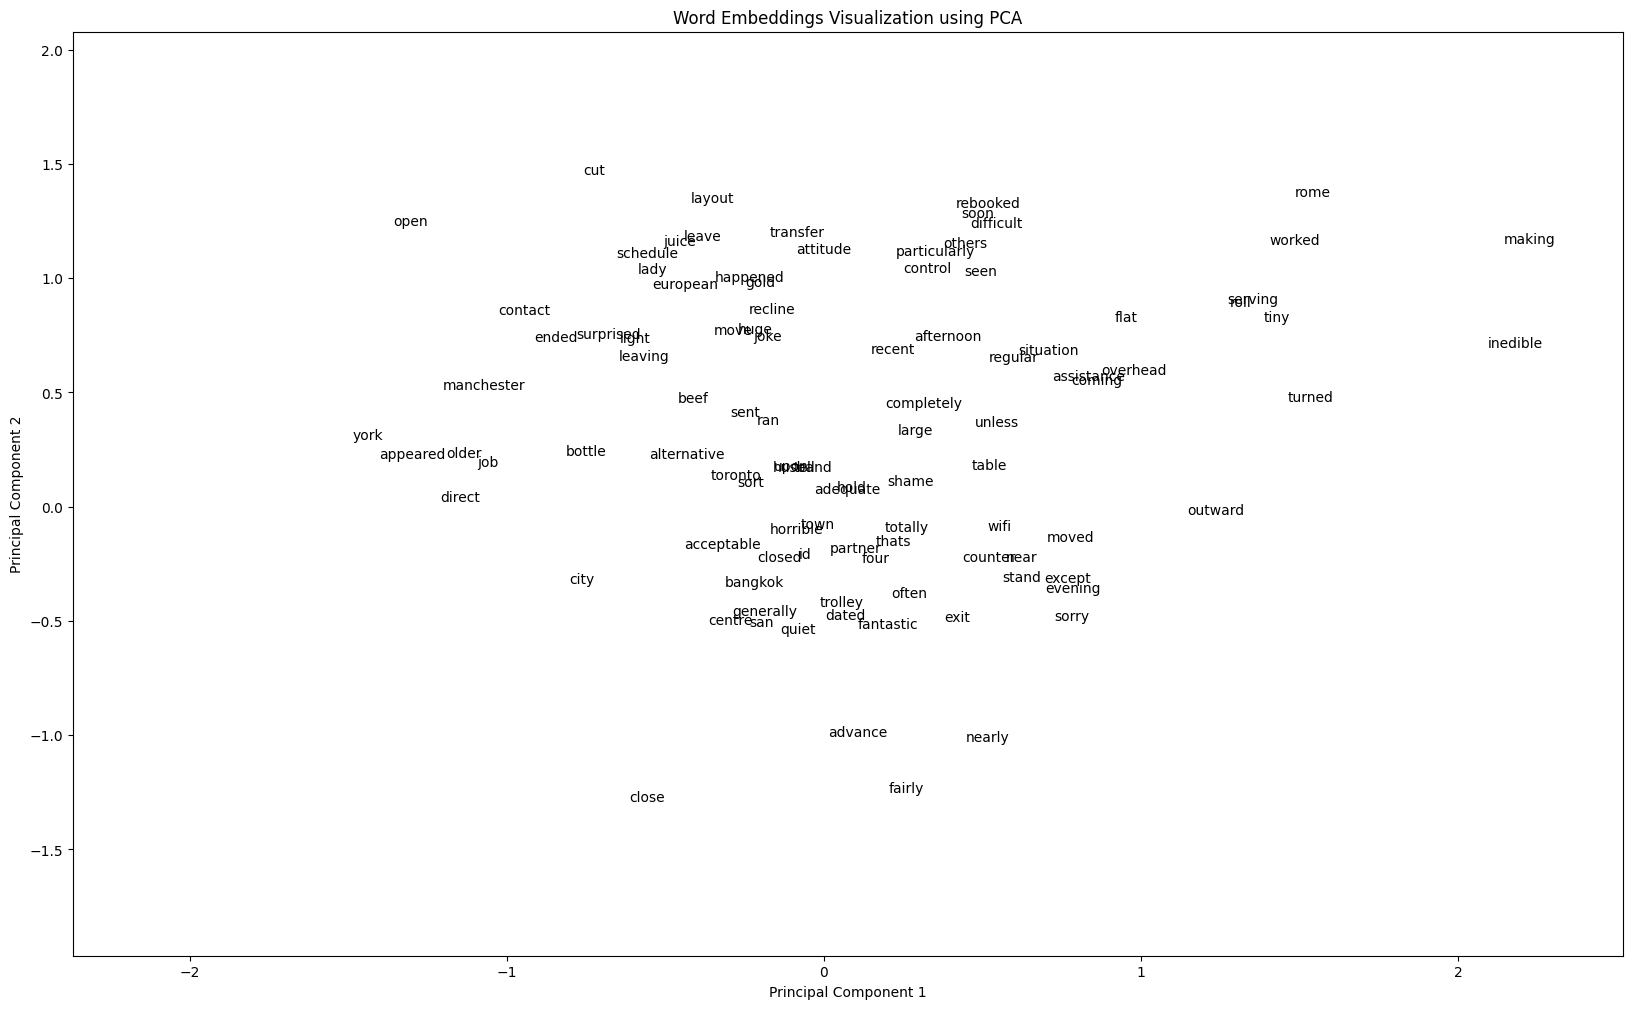

In [ ]:
# Visualize word embeddings
#creates a new figure with a specified size.
plt.figure(figsize=(20, 12))
#creates a scatter plot using the reduced 2D word vectors, plot the values in the first column of word_vectors_2d on the x-axis and the values in the second column on the y-axis.
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1],marker='.', color='w')
#For each word annotate the corresponding point on the scatter plot with the word label using plt.annotate().
#The xy parameter specifies the coordinates of the annotation, which are the values from word_vectors_2d for the current word. The fontsize parameter sets the font size of the annotations to 10.
# Here we are  ploting randmoly index from 500 to 600 only for visualization purpose due to large size index.
for i, word in enumerate(word_vectors.index_to_key[500:600]):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10,textcoords='offset points', ha='right')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Word Embeddings Visualization using PCA")
plt.show()

Observations :- Here visualizing word embeddings using a scatter plot with the help of Principal Component Analysis (PCA). This visualization aims to provide a representation of word embeddings in a reduced 2D space for better interpretability.

In [ ]:
# Importing libraries
import gensim
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
# Define a fcuntion to get top 5 similar words from already trained w2v model
def get_top_similar_words(word, model, top_n=5):
    try:
        # Get the vector representation of the word
        word_vector = model.wv[word].reshape(1, -1)

        # Calculate cosine similarity between the word and all other words in the vocabulary
        similarities = cosine_similarity(word_vector, model.wv.vectors)

        # Get indices of top N similar words (excluding the word itself)
        top_similar_indices = similarities.argsort()[0][-top_n-1:-1][::-1]


        # Get the actual words corresponding to the indices
        top_similar_words = [model.wv.index_to_key[idx] for idx in top_similar_indices]

        return top_similar_words
    except KeyError:
        return f"{word} not in vocabulary"

Observations :- This function named get_top_similar_words that retrieves the top N(here 5) similar words to a given word from an already trained Word2Vec (w2v) model. This function provides a convenient way to find semantically similar words based on the learned word embeddings in the Word2Vec model.

In [ ]:
def get_similarity_scores(word, top_n=5):
    try:
        # Check if the word is in the
        word_vector = model.wv[word].reshape(1, -1)
        if word in word_vectors:
            # Get the top N similar words and their similarity scores
            similar_words = model.wv.similar_by_word(word, topn=top_n)

            # Display the results
            result_str = f"Similarity scores :\n"
            for similar_word, similarity_score in similar_words:
                result_str += f"{similar_word}: {similarity_score:.4f}\n"
            return result_str
        else:
            return f"{word} is not in the vocabulary."
    except Exception as e:
        return f"An error occurred: {e}"

Observations :- This function named get_similarity_scores that calculates the similarity scores between a given word and the top N similar words based on an already trained Word2Vec model. This function is designed to provide information about the similarity scores between a given word and its most similar words in the Word2Vec model.

In [ ]:
# To check top 5 similar words based upon below given words test casess
word_to_check = ['delay', 'flight', 'london','british', 'refund']
for each_word in word_to_check:
    model = w2v_model_sg
    top_similar_words = get_top_similar_words(each_word, model)
    print(f"Top 5 similar words for '{each_word}': {top_similar_words}")

    # Get similarity scores based upon given word
    similarity_scores_result = get_similarity_scores(each_word, top_n=5)
    print(similarity_scores_result)
    print("\n")


Top 5 similar words for 'delay': ['runway', 'began', 'twenty', 'slot', 'depart']
Similarity scores :
runway: 0.9945
began: 0.9943
twenty: 0.9924
slot: 0.9921
depart: 0.9915



Top 5 similar words for 'flight': ['time', 'kiev', 'manlhr', 'journey', 'kuwait']
Similarity scores :
time: 0.9914
kiev: 0.9911
manlhr: 0.9815
journey: 0.9777
kuwait: 0.9771



Top 5 similar words for 'london': ['abu', 'prague', 'newark', 'dhabi', 'francisco']
Similarity scores :
abu: 0.9977
prague: 0.9976
newark: 0.9966
dhabi: 0.9966
francisco: 0.9962



Top 5 similar words for 'british': ['mauritius', 'travelled', 'recently', 'excited', 'roundtrip']
Similarity scores :
mauritius: 0.9975
travelled: 0.9966
recently: 0.9958
excited: 0.9940
roundtrip: 0.9915



Top 5 similar words for 'refund': ['compensation', 'cancel', 'voucher', 'reimbursed', 'reimburse']
Similarity scores :
compensation: 0.9879
cancel: 0.9855
voucher: 0.9846
reimbursed: 0.9833
reimburse: 0.9815





Observations :- This function iterates through a list of words (word_to_check), checks the top 5 similar words using the get_top_similar_words function, and obtains similarity scores using the get_similarity_scores function for each word. This gives insights into the similarity relationships between the specified words and their most similar words based on the trained Word2Vec model.

Observations :- To identify the names of the top five similar words with significant similarity, we have used a similarity metric like cosine similarity on the vectorized representations of words. Additionally, for dimensionality reduction and visualization in a 2D semantic space, Principal Component Analysis (PCA) also applied. Cosine similarity is implicitly used when obtaining similarity scores from the Word2Vec model. It is a common metric for measuring the similarity between vectors in high-dimensional spaces,particularly in the context of word embeddings.

Observations :- **Cosine similarity metric used cosndering below points.**
1. Cosine similarity measures the cosine of the angle between two vectors. In the context of word embeddings, vectors represent the semantic meaning of words.
2. Cosine similarity is preferred for word embeddings because it is invariant to the magnitude of vectors and focuses on the direction. It is well-suited for capturing semantic similarity rather than magnitude.

Observations :- **Some points regarding used Design Techniques**
1. Word Embeddings: Trained Word2Vec word embeddings (w2v_model_sg).
2. Vectorized Representations: Word vectors are used to represent the semantic meaning of words.
3. PCA Dimensionality Reduction: Principal Component Analysis (PCA) is applied for dimensionality reduction to visualize word embeddings in a 2D semantic space.
4. Top Similar Words: The code identifies and prints the top N similar words for a given word based on cosine similarity scores obtained from the Word2Vec model.

These design choices aim to provide insights into the semantic relationships between words in a visually interpretable 2D space. PCA is employed for dimensionality reduction to facilitate visualization while preserving the semantic structure of the word embeddings.